In [2]:
print(14 * " >", "\t n.B.a. \t", "< " * 14, "\n\n\n")

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

 > > > > > > > > > > > > > > 	 n.B.a. 	 < < < < < < < < < < < < < <  





/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2019.csv


In [3]:
timesData1 = pd.read_csv("../input/world-happiness/2015.csv")
timesData1["year"]= 2015
timesData1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')

In [4]:
timesData1.rename(columns={'Dystopia Residual': 'Dystopia_Residual', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Health (Life Expectancy)': 'Health(Life_Expectancy)', 'Lower Confidence Interval': 'Lower_Confidence_Interval', 'Standard Error': 'Standard_Error', 'Trust (Government Corruption)': 'Trust(Government_Corruption)'}, inplace=True)

In [5]:

timesData2 = pd.read_csv("../input/world-happiness/2016.csv")
timesData2["year"]= 2016
# timesData2
timesData2.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')

In [6]:
timesData2.rename(columns={'Dystopia Residual': 'Dystopia_Residual', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score', 'Health (Life Expectancy)': 'Health(Life_Expectancy)', 'Upper Confidence Interval': 'Upper_Confidence_Interval', 'Lower Confidence Interval': 'Lower_Confidence_Interval', 'Standard Error': 'Standard_Error', 'Trust (Government Corruption)': 'Trust(Government_Corruption)'}, inplace=True)

In [7]:
timesData2.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_GDP_per_Capita', 'Family', 'Health(Life_Expectancy)',
       'Freedom', 'Trust(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'year'],
      dtype='object')

In [8]:
timesData3 = pd.read_csv("../input/world-happiness/2017.csv")
timesData3["year"]= 2017
# timesData3
timesData3.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')

In [9]:
timesData3.rename(columns={'Dystopia.Residual': 'Dystopia_Residual', 'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita', 'Happiness.Rank': 'Happiness_Rank', 'Happiness.Score': 'Happiness_Score', 'Health..Life.Expectancy.': 'Health(Life_Expectancy)', 'Trust..Government.Corruption.': 'Trust(Government_Corruption)'}, inplace=True)

In [10]:
timesData3.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker.high',
       'Whisker.low', 'Economy_GDP_per_Capita', 'Family',
       'Health(Life_Expectancy)', 'Freedom', 'Generosity',
       'Trust(Government_Corruption)', 'Dystopia_Residual', 'year'],
      dtype='object')

In [11]:

happinessData = pd.concat([timesData1,timesData2,timesData3])
happinessData.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual,year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [12]:
happinessData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 154
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       470 non-null    object 
 1   Region                        315 non-null    object 
 2   Happiness_Rank                470 non-null    int64  
 3   Happiness_Score               470 non-null    float64
 4   Standard_Error                158 non-null    float64
 5   Economy_GDP_per_Capita        470 non-null    float64
 6   Family                        470 non-null    float64
 7   Health(Life_Expectancy)       470 non-null    float64
 8   Freedom                       470 non-null    float64
 9   Trust(Government_Corruption)  470 non-null    float64
 10  Generosity                    470 non-null    float64
 11  Dystopia_Residual             470 non-null    float64
 12  year                          470 non-null    int64  
 13  Lower_Conf

# Line Charts

Line Charts Example: Generosity and Happiness Score vs World Happiness Report

In [13]:
# prepare data frame
df = happinessData.iloc[:100,:]                             # dataframe ilk 100 uzerinden alindi!!!!

# Creating trace1
trace1 = go.Scatter(
                    x = df.Happiness_Rank,                         # dataframe de sutun isimleri birebir
                    y = df.Generosity,
                    mode = "lines",
                    name = "Generosity",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.Country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.Happiness_Rank,
                    y = df.Happiness_Score,
                    mode = "lines+markers",
                    name = "Happiness_Score",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),    #isaretleme noktalama renkleri ve saydamligi 0.8 olacak
                    text= df.Country)                          #grafikte uzerinde gelince isim gorunsun diye kullaniliyor
data = [trace1, trace2]
layout = dict(title = 'Generosity and Happiness Score vs World Rank of Top 100 Happiness Country',
              xaxis= dict(title= 'Happiness_Rank',ticklen= 5,zeroline= False)      #zeroline sifirdan baslamak gosterilsin mi?
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Scatter

Scatter Example: Generosity and Happiness Score vs World Happiness Report with 2015, 2016 and 2017 years

In [14]:
# prepare data frames
df2015 = happinessData[happinessData.year == 2015].iloc[:100,:]             # 2014 2015 2016 ilk 100 al
df2016 = happinessData[happinessData.year == 2016].iloc[:100,:]
df2017 = happinessData[happinessData.year == 2017].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go                              # go burada modul ismi olarak adlandirildi
# creating trace1
trace1 =go.Scatter(
                    x = df2015.Happiness_Rank,
                    y = df2015.Generosity,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2015.Country)
# creating trace2
trace2 =go.Scatter(
                    x = df2016.Happiness_Rank,
                    y = df2016.Generosity,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2016.Country)
# creating trace3
trace3 =go.Scatter(
                    x = df2017.Happiness_Rank,
                    y = df2017.Generosity,
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2017.Country)
data = [trace1, trace2, trace3]
layout = dict(title = 'Generosity vs Happiness_Rank of top 100 Countries with 2015, 2016 and 2017 years',
              xaxis= dict(title= 'Happiness_Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Generosity',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Bar Charts

First Bar Charts Example: Generosity and Happiness_Rank of top 3 Countries in 2015 (style1)

In [15]:
# prepare data frames
df2015 = happinessData[happinessData.year == 2015].iloc[:3,:]
df2015

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual,year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN


In [16]:
# prepare data frames
df2015 = happinessData[happinessData.year == 2015].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1
trace1 = go.Bar(
                x = df2015.Country,
                y = df2015.Generosity,
                name = "Generosity",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Region)
# create trace2
trace2 = go.Bar(
                x = df2015.Country,
                y = df2015.Happiness_Rank,
                name = "Happiness_Rank",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Region)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Second Bar Charts Example(Another way to alternate drawing):
Generosity and Happiness_Rank of top 3 countries in 2015 (style2) Actually, if you change only the barmode from group to relative in previous example, you achieve what we did here. However, for diversity I use different syntaxes.

In [17]:
# prepare data frames
df2015 = happinessData[happinessData.year == 2015].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2015.Country

trace1 = {
  'x': x,
  'y': df2015.Generosity,
  'name': 'Generosity',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2015.Happiness_Score,
  'name': 'Happiness_Score',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 countries'},
  'barmode': 'relative',
  'title': 'Generosity and Happiness_Rank of top 3 countries in 2015'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Third Bar Charts Example:
Horizontal bar charts. (style3) Generosity vs Freedom for countries

In [18]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = happinessData[happinessData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.Freedom]
y_net_worth  = [float(each) for each in df2016.Economy_GDP_per_Capita]
x_saving = [each for each in df2016.Country]
x_net_worth  = [each for each in df2016.Country]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Freedom',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='Economy(GDP_per_Capita)',
)
layout = dict(
                title='Generosity and Economy(GDP_per_Capita)',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)             #decimal 2 basamakli round ettir
y_nw = np.rint(y_net_worth)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

# Pie Charts

Pie Charts Example: Freedom rate of top 7 countries in 2017

In [19]:
# data preparation
df2017 = happinessData[happinessData.year == 2017].iloc[:7,:]
# df2016
# burda num_students te ',' kullanilmis ve bunlari '.' ile degistirmemiz gerekiyor.

#Replace yapiyoruz
pie1 = df2017.Freedom
# pie1_list = [float(each.replace(',', '.')) for each in df2017.Freedom]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2017.Country

In [20]:
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Freedom Of Countries",
      "hoverinfo":"label+percent+name",
      "hole": .3,                                   # simit seklinde gostermek icin
      "type": "pie"
    },],
  "layout": {
        "title":"Countries rate of Freedom",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Freedom rate",
                "x": 0.135,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

# Bubble Charts

Bubble Charts Example: Countries Happiness rank (first 20) vs Happiness score and Dystopia_Residual (color) in 2017

In [21]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       7 non-null      object 
 1   Region                        0 non-null      object 
 2   Happiness_Rank                7 non-null      int64  
 3   Happiness_Score               7 non-null      float64
 4   Standard_Error                0 non-null      float64
 5   Economy_GDP_per_Capita        7 non-null      float64
 6   Family                        7 non-null      float64
 7   Health(Life_Expectancy)       7 non-null      float64
 8   Freedom                       7 non-null      float64
 9   Trust(Government_Corruption)  7 non-null      float64
 10  Generosity                    7 non-null      float64
 11  Dystopia_Residual             7 non-null      float64
 12  year                          7 non-null      int64  
 13  Lower_Confiden

In [22]:
# data preparation: buradada ',' ile '.' arasinda replace yaparak datamizi duzenleyelim

df2017 = happinessData[happinessData.year == 2017].iloc[:20,:]                 #ilk 20 degeri aldik
Happiness_size  = [float(each) for each in df2017.Happiness_Score]
Dystopia_Residual_color = [float(each) for each in df2017.Dystopia_Residual]
data = [
    {
        'y': df2017.Happiness_Score,
        'x': df2017.Happiness_Rank,
        'mode': 'markers',
        'marker': {
            'color': Dystopia_Residual_color,
            'size': Happiness_size,
            'showscale': True
        },
        "text" :  df2017.Country
    }
]
iplot(data)


# Histogram

Lets look at histogram of Family ratio in 2015 and 2017 years.

In [23]:
# prepare data
x2015 = happinessData.Family[happinessData.year == 2015]
x2017 = happinessData.Family[happinessData.year == 2017]

trace1 = go.Histogram(
    x=x2015,
    opacity=0.75,
    name = "2015",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2017,
    opacity=0.75,
    name = "2017",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',                           # overlay ustuste sutunlari cizdirme yapiyor
                   title=' Family ratio in 2015 and 2017',
                   xaxis=dict(title='Family ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Word Cloud

Evaluations should be made, whichever is more and if it is in that country, make the words bigger according to it!

Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2017.

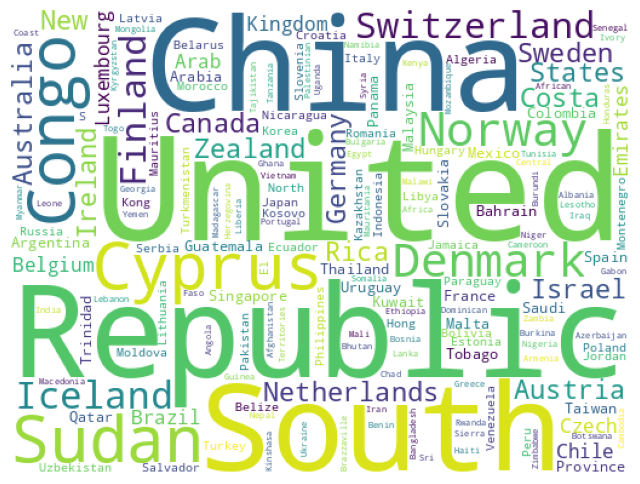

In [24]:
from wordcloud import WordCloud           # Degerlendirmeler yapilsin hangi daha coksa ve o ulkedeyse ona gore kelimeleri buyuk yapsin!

# data prepararion
x2017 = happinessData.Country[happinessData.year == 2017]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(" ".join(x2017))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Box Plots

- Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
    - 25th percentile = quartile 1 (Q1) that is lower quartile
    - 75th percentile = quartile 3 (Q3) that is higher quartile
    - height of box = IQR = interquartile range = Q3-Q1
    - Whiskers = 1.5 * IQR from the Q1 and Q3
    - Outliers = being more than 1.5*IQR away from median commonly.

    trace = box
        y = data we want to visualize with box plot
        marker = color

In [25]:
# data preparation
x2015 = happinessData[happinessData.year == 2015]

trace0 = go.Box(
    y=x2015.Happiness_Score,
    name = 'Happiness_Score of Countries in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.Family,
    name = 'Family of Countries in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

# Scatter Matrix Plots

Scatter Matrix = it helps us to see covariance and relation between more than 2 features

In [26]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = happinessData[happinessData.year == 2015]
data2015 = dataframe.loc[:,["Family","Dystopia_Residual", "Happiness_Score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)


# Inset Plots

Inset Matrix = 2 plots are in one frame


In [27]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Generosity,
    name = "Generosity",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Economy_GDP_per_Capita,
    xaxis='x2',
    yaxis='y2',
    name = "Economy_GDP_per_Capita",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Economy_GDP_per_Capita and Generosity vs Happiness_rank of Countries'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 3D Scatter Plot with Colorscaling

3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.

In [28]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.Happiness_Rank,
    y=dataframe.Family,
    z=dataframe.Generosity,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(18, 255, 253)',                # set color to an array/list of desired values
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )

)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


# Multiple Subplots

Multiple Subplots: While comparing more than one features, multiple subplots can be useful.


In [29]:
trace1 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Family,
    name = "Family"
)
trace2 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Generosity,
    xaxis='x2',
    yaxis='y2',
    name = "Generosity"
)
trace3 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Economy_GDP_per_Capita,
    xaxis='x3',
    yaxis='y3',
    name = "Economy_GDP_per_Capita"
)
trace4 = go.Scatter(
    x=dataframe.Happiness_Rank,
    y=dataframe.Happiness_Score,
    xaxis='x4',
    yaxis='y4',
    name = "Happiness_Score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Family, Generosity, Economy_GDP_per_Capita and Happiness_Score VS World Rank of Countries'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
happinessData.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health(Life_Expectancy),Freedom,Trust(Government_Corruption),Generosity,Dystopia_Residual,year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


Visually I tried to show the World Happiness map. I hope the visuals help you with your work. See you on my next job.

### PS: Don't forget to post a comment and Upvote, please!